# AISHWARYA SRIVASTAVA - IoT & Computer Vision Intern at 'The Sparks Foundation'

## TASK 2- COLOR IDENTIFICATION IN IMAGES

## Implement an image color detector which identifies all the colors in an image or video.

#### .

### Import Relevant Libraries

In [1]:
# For this practical example we will need the following libraries and modules

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Working with OpenCV

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


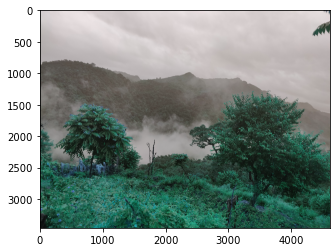

In [2]:
#Load a sample image and understand the basic operations that we can perform on it.

image = cv2.imread('sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

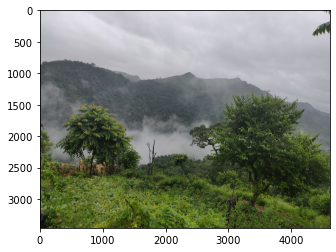

In [3]:
#We see that the image has different colors as compared to the original image. 
#This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. 
#Thus, we need to convert it into REG GREEN BLUE i.e. RGB

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

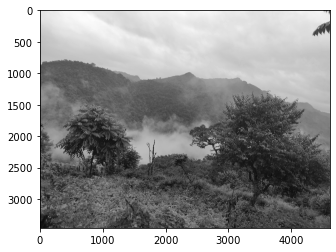

In [4]:
#The image can also be converted to grayscale if needed.

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

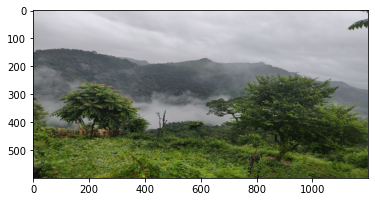

In [5]:
#Resizing the image to a particular dimension.

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

### Color Identification

In [6]:
#To identify colors from an image, we will first define a function that will give us the hex values of the colors which we want to identify.

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
#KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. 
#Then, we can apply KMeans to first fit and then predict on the image to get the results. 
#Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

#I have combined all the steps in two method.

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([120.53234633, 125.13634243, 124.950876  ]),
 array([179.15662318, 179.75545382, 186.17115751]),
 array([53.77029832, 66.45308701, 33.7298796 ]),
 array([206.35440066, 206.06165127, 213.51631554]),
 array([77.87246763, 95.51446825, 38.36493458]),
 array([29.74822531, 38.07048611, 20.93572531]),
 array([83.74623285, 90.62085276, 91.84998986]),
 array([109.67395253, 125.24757811,  56.33852022])]

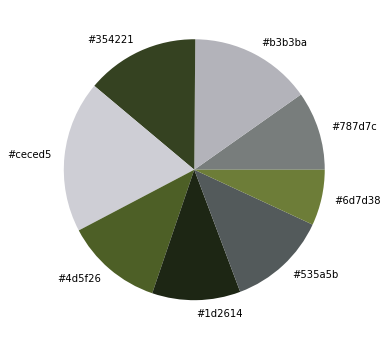

In [10]:
get_colors(get_image('sample_image.jpg'), 8, True)

### Search images using Color

In [11]:
#From the model above, we can extract major colors.This creates the opportunity to search for images based on certain colors.
#We can select a color and if its hex matches or is close to the hex of the major colors of the image, we say it's a match.
#We first get all the images and store them in the images folder.

IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

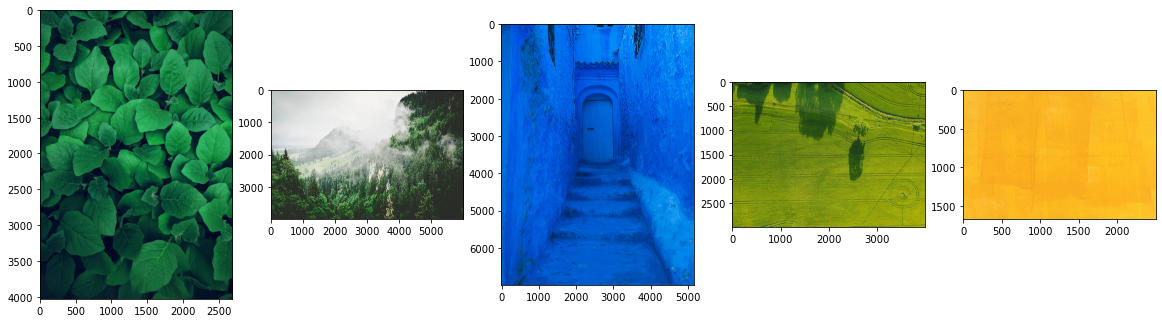

In [12]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [13]:
#We define the match function below. We will try to match with the top 10 colors of the image. 
#It is highly possible that there will be no exact match for the hex codes, 
#thus we calculate the similarity between the chosen color and the colors of the image.

#We keep a threshold value such that if the difference between the chosen color and any of the selected colors is less than that
#threshold, we declare it as a match.

#Hex values or RGB values cannot be directly compared so we first convert them to a device independant and color uniform space.
#We use rgb2lab to convert the values and then find the difference using deltaE_cie76. 
#The method calculates the difference between all top 5 colors of the image and the selected color and if atleast one is below 
#the threshold, we show the image.

In [14]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [15]:
#We call the above method for all the images in our set and show relevant images out of the same
#that approximately match our selected color.

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

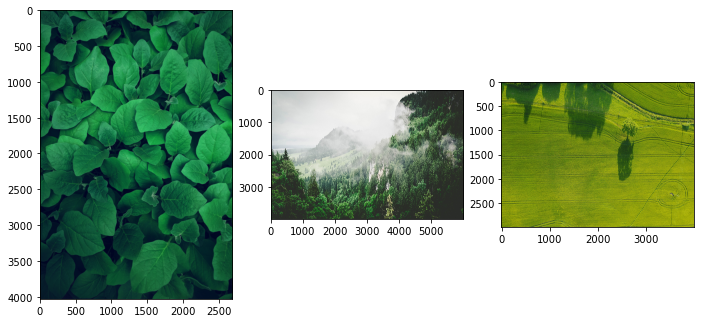

In [16]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

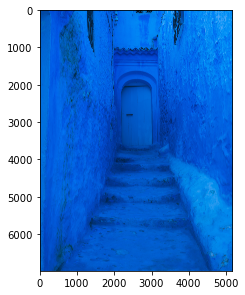

In [17]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

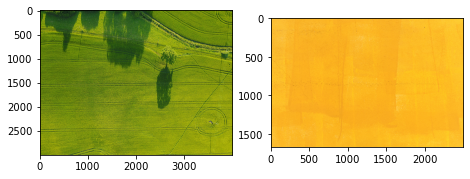

In [18]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

### Conclusion
In this notebook, we used KMeans to extract majority colors from images. We then used the RGB Values of Colors to identify images from a collection that have that color in them.